### 1. Pacotes

Iniciamos o projeto carregando os pacotes necessários:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr, pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

### 2. Base de Dados

Para continuar com o projeto de regressão, utilizamos a função apropriada para importar as bases de dados de treino e de teste:

In [2]:
df_train = pd.read_csv('regression_train.csv')
df_test = pd.read_csv('regression_test.csv')

In [3]:
df_train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


In [4]:
df_test.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,3.436244,0.210854,-2.451307,51.239996,4.641751,-67.874319,5,-5.760571
1,1525.839412,2.157483,4.337776,43.828794,8.070219,-68.405526,8,10.193773
2,455.600191,5.166359,-0.452615,43.931305,1.349625,-66.240021,0,-1.063645
3,0.619759,3.276641,-3.607201,50.631046,2.473542,-69.971690,8,-8.476921
4,10.996472,-1.867485,-2.408863,58.660224,2.826219,-53.647149,5,-5.660827


In [5]:
print(df_train.shape)
print(df_test.shape)

(1042, 8)
(261, 8)


Após a importação, visualizamos as 5 primeiras observações de cada uma das bases e utilizamos a propriedade _.shape_ para visualizar o nº de linhas e colunas em cada uma.

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  715 non-null    float64
 1   X1      1042 non-null   float64
 2   X2      1031 non-null   float64
 3   X3      1042 non-null   float64
 4   X4      1042 non-null   float64
 5   X5      1042 non-null   float64
 6   X6      1042 non-null   int64  
 7   X7      1042 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 65.2 KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  180 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


Por fim, inspecionamos os tipos de dados nas bases e constatamos também que há valores nulos.

### 3. Data Cleaning

#### 3.1 df_train - outlier reduction

Para iniciar o processo de limpeza da base de dados, será gerado um gráfico _boxplot_ para identificar se há outliers:

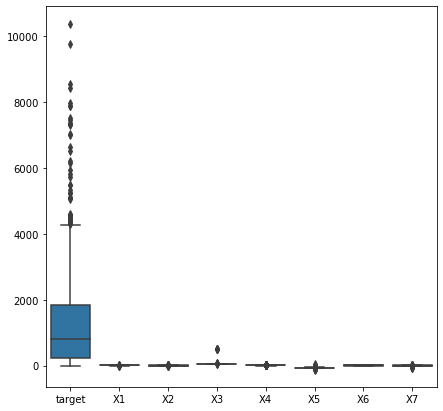

In [8]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(data=df_train);

Como visto acima, todas as variáveis (exceto _X6_) possuem outliers, com isso, prosseguiremos com a visualização da distribuição de cada uma para, a seguir, efetuar a redução desses outliers:

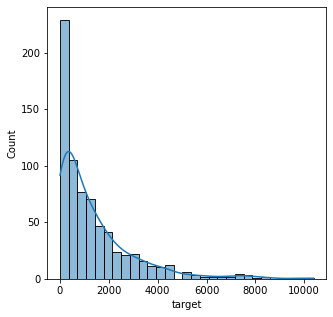

In [9]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='target', data=df_train, kde=True);

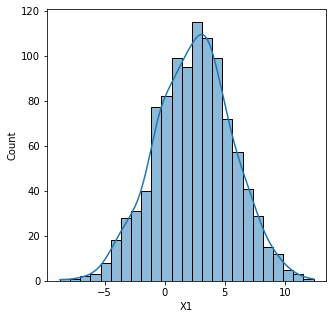

In [10]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X1', data=df_train, kde=True);

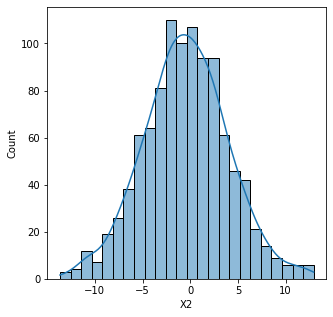

In [11]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X2', data=df_train, kde=True);

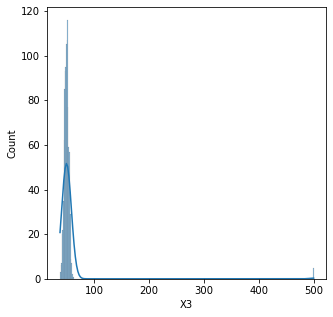

In [12]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X3', data=df_train, kde=True);

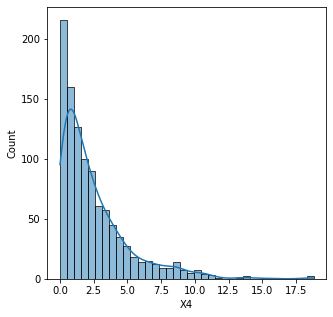

In [13]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X4', data=df_train, kde=True);

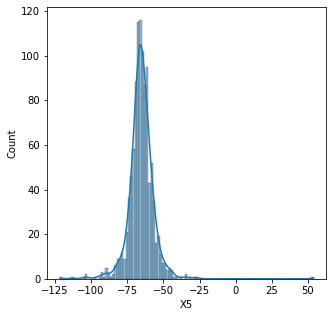

In [14]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X5', data=df_train, kde=True);

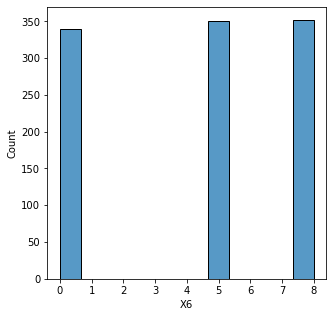

In [15]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X6', data=df_train);

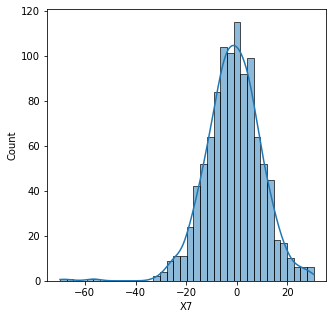

In [16]:
fig = plt.figure(figsize=(5,5))
sns.histplot(x='X7', data=df_train, kde=True);

Conforme visto acima, as variáveis _X1_, _X2_, _X3_, _X5_ e _X7_ possuem uma distribuição gaussiana, enquanto as variáveis _target_, _X4_ e _X6_ possuem distribuições assimétricas, com isso, serão utilizadas duas metodologias para a limpeza desses dados: Para as variáveis com a distribuição gaussiana, utilizaremos o desvio padrão e, para as variáveis assimétricas, utilizaremos o _interquartile range_ (IQR):

In [17]:
gauss = ['X1', 'X2', 'X3', 'X5', 'X7']

for i in gauss:
    superior = df_train[i].mean() + 3*df_train[i].std()
    inferior = df_train[i].mean() - 3*df_train[i].std()
    df_train = df_train[(df_train[i] < superior) & (df_train[i] > inferior)]

In [18]:
skewed = ['target', 'X4', 'X6']

for i in skewed:
    percentil_25 = df_train[i].quantile(0.25)
    percentil_75 = df_train[i].quantile(0.75)
    superior = percentil_75 + 1.5 * iqr(df_train[i], nan_policy='omit')
    inferior = percentil_25 - 1.5 * iqr(df_train[i], nan_policy='omit')
    df_train = df_train[(df_train[i] < superior) & (df_train[i] > inferior)]

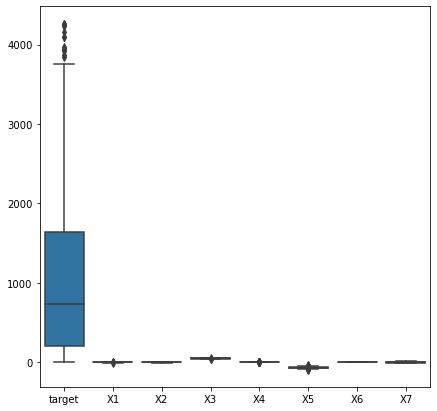

In [19]:
fig = plt.figure(figsize=(7,7))
sns.boxplot(data=df_train);

Conforme exibido pelo _boxplot_ acima, podemos ver que o número total de outliers foi reduzido.

#### 3.2 df_train - NaN treatment

Com a redução dos outliers, o próximo passo para a limpeza de dados é o tratamento dos valores nulos (NaN) e, similar ao tratamento anterior, utilizaremos duas formas de tratamento, para as variáveis gaussianas, os valores nulos serão substituidos pela média da variável e, para as variáveis assimétricas, os valores nulos serão substituidos pela mediana:

In [20]:
for i in gauss:
    df_train[i] = df_train[i].fillna(df_train[i].mean())

In [21]:
for i in skewed:
    df_train[i] = df_train[i].fillna(df_train[i].median())

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 1 to 1041
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  617 non-null    float64
 1   X1      617 non-null    float64
 2   X2      617 non-null    float64
 3   X3      617 non-null    float64
 4   X4      617 non-null    float64
 5   X5      617 non-null    float64
 6   X6      617 non-null    int64  
 7   X7      617 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 43.4 KB


#### 3.3 df_test - NaN treatment

O tratamento também é feito na base de dados _df_test_, onde os valores nulos da variável _target_ também são substituidos pela mediana.

In [23]:
df_test['target'] = df_test['target'].fillna(df_test['target'].median())

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  261 non-null    float64
 1   X1      261 non-null    float64
 2   X2      261 non-null    float64
 3   X3      261 non-null    float64
 4   X4      261 non-null    float64
 5   X5      261 non-null    float64
 6   X6      261 non-null    int64  
 7   X7      261 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 16.4 KB


### 4. Modelagem

Após a preparação dos dados, seguiremos para a criação dos modelos, sendo eles a Regressão Linear, Àrvore de Decisão, _Random Forest_, _Support Vector Machine_ e _XGBoost_. Para iniciar a modelagem, as bases de treino e teste (_df_train_ e _df_test_) serão separadas entre variáveis dependentes (_y train_ e _y test_) e independentes (_X train_ e _X test_): 

In [25]:
X_train = df_train.iloc[:,1:].values
y_train = df_train.iloc[:,0].values

In [26]:
X_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

##### Regressão Linear

In [27]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train)
p_reg_lin = reg_lin.predict(X_test)
reg_lin_r2 = r2_score(y_test, p_reg_lin)
RMSE_reg_lin = sqrt(mean_squared_error(y_test, p_reg_lin))
cor_reg_lin = pearsonr(y_test, p_reg_lin)

##### Àrvore de decisão

In [28]:
dec_tree = DecisionTreeRegressor(random_state=42)
dec_tree.fit(X_train, y_train)
p_dec_tree = dec_tree.predict(X_test)
dec_tree_r2 = r2_score(y_test, p_dec_tree)
RMSE_dec_tree = sqrt(mean_squared_error(y_test, p_dec_tree))
cor_dec_tree = pearsonr(y_test, p_dec_tree)

##### Random Forest

In [29]:
r_forest = RandomForestRegressor(random_state=42)
r_forest.fit(X_train, y_train)
p_r_forest = r_forest.predict(X_test)
r_forest_r2 = r2_score(y_test, p_r_forest)
RMSE_r_forest = sqrt(mean_squared_error(y_test, p_r_forest))
cor_r_forest = pearsonr(y_test, p_r_forest)

##### Support Vector Machine

In [30]:
svm = SVR()
svm.fit(X_train, y_train)
p_svm = svm.predict(X_test)
svm_r2 = r2_score(y_test, p_svm)
RMSE_svm = sqrt(mean_squared_error(y_test, p_svm))
cor_svm = pearsonr(y_test, p_svm)

##### XGBoost

In [31]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)
p_xgb = xgb.predict(X_test)
xgb_r2 = r2_score(y_test, p_xgb)
RMSE_xgb = sqrt(mean_squared_error(y_test, p_xgb))
cor_xgb = pearsonr(y_test, p_xgb)

#### Resultados

##### R2

In [32]:
print('Coeficientes de determinação (R²)' + '\n' +
      'Regressão Linear: ' + str(round(reg_lin_r2, 2)) + '\n' +
      'Àrvore de Decisão: ' + str(round(dec_tree_r2, 2)) + '\n' +
      'Random Forest: ' + str(round(r_forest_r2, 2)) + '\n' +
      'Support Vector Machine: ' + str(round(svm_r2, 2)) + '\n' +
      'XGBoost: ' + str(round(xgb_r2, 2))
     )

Coeficientes de determinação (R²)
Regressão Linear: -0.72
Àrvore de Decisão: 0.76
Random Forest: 0.77
Support Vector Machine: -0.03
XGBoost: 0.78


##### RMSE

In [33]:
print('Root Mean Squared Error (RMSE)' + '\n' +
      'Regressão Linear: ' + str(round(RMSE_reg_lin, 2)) + '\n' +
      'Àrvore de Decisão: ' + str(round(RMSE_dec_tree, 2)) + '\n' +
      'Random Forest: ' + str(round(RMSE_r_forest, 2)) + '\n' +
      'Support Vector Machine: ' + str(round(RMSE_svm, 2)) + '\n' +
      'XGBoost: ' + str(round(RMSE_xgb, 2))
     )

Root Mean Squared Error (RMSE)
Regressão Linear: 1402.03
Àrvore de Decisão: 523.21
Random Forest: 509.6
Support Vector Machine: 1085.04
XGBoost: 502.33


##### Correlação

In [34]:
print('Correlação de Pearson' + '\n' +
      'Regressão Linear: ' + str(round(cor_reg_lin[0], 2)) + '\n' +
      'Àrvore de Decisão: ' + str(round(cor_dec_tree[0], 2)) + '\n' +
      'Random Forest: ' + str(round(cor_r_forest[0], 2)) + '\n' +
      'Support Vector Machine: ' + str(round(cor_svm[0], 2)) + '\n' +
      'XGBoost: ' + str(round(cor_xgb[0], 2))
     )

Correlação de Pearson
Regressão Linear: 0.65
Àrvore de Decisão: 0.89
Random Forest: 0.89
Support Vector Machine: 0.68
XGBoost: 0.9


Dados os resultados apresentados acima, o modelo _XGBoost_ apresentou o melhor desempenho, pois exibiu o maior coeficiente de determinação, a melhor correlação entre os valores observados e preditos e a menor raíz do erro quadrático médio.

In [35]:
for importance, name in sorted(zip(xgb.feature_importances_, df_train.columns[1:]),reverse=True):
    print(name, importance)

X2 0.96748906
X1 0.02281791
X3 0.004415533
X4 0.002983157
X5 0.0019571676
X6 0.00033716965
X7 0.0


Dado que o modelo _XGBoost_ apresentou o melhor resultado, analisamos o impacto de data _feature_ em seu resultado e, podemos constatar que o resultado é majoritariamente impactado pela variável _X2_, com impactos menores pelas variáveis _X1_, _X3_, _X4_, _X5_ e _X6_ e uma ausência de impacto pela variável _X7_.